#### DataSet -- https://www.kaggle.com/usdot/flight-delays

# Aim is to visualize airtime intervals, flight destinations, flight delays (arrival and departure arrivals).

Delayed aircraft are estimated to have cost the airlines several billion dollars in additional expense

taxi_out = wheels_off - departure_time <br>
taxi_in = arrival_time - wheels_on <br>
air_time = wheels_on - wheels_off <br>
elapsed_time =air_time + taxi_in + taxi_out <br>

In [1]:
import pandas as pd                 #imports pandas library
import numpy as np                  #imports numpy library
import matplotlib as mpl            #imports matplotlib library
import matplotlib.pyplot as plt     #imports pyplot functions from matplotlib library which works like MATLAB
import plotly.offline as py         #imports plotly libraty and allows to generate graphs offline 
import plotly.graph_objs as go      #The plotly.graph_objects module contains an automatically-generated hierarchy
                                    #of Python classes which represent non-leaf nodes in this figure schema.
import seaborn as sns               #imports seaborn library
#!pip install pywaffle              #installs pywaffle package 
from pywaffle import Waffle         #imports matplotlibpython waffle visualization from pywaffle package

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reads the airlines data from csv file
airlines = pd.read_csv('C:/Users/arunk/Downloads/Flight Delays/airlines.csv')
#Displays the first five rows of airlines dataset
airlines.head()                       

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [3]:
#reads the flights data from csv file
flights = pd.read_csv('C:/Users/arunk/Downloads/Flight Delays/flights.csv',low_memory=False)
#Displays the first five rows of airlines dataset
flights.head()                       

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#reads the airports data from csv file
airports = pd.read_csv('C:/Users/arunk/Downloads/Flight Delays/airports.csv')
#Displays the first five rows of airlines dataset
airports.head()                       

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
#Displays the columns name in flights data frame
flights.columns                      

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

## Data Preprocessing 

In [7]:
#displays the columns wise count of nullvalues as Missing Record Count and its percentage as Missing Percentage (%)
pd.concat([flights.isnull().sum(), 100 * flights.isnull().sum()/len(flights)], 
              axis=1).rename(columns={0:'Missing Record Count', 1:'Missing Percentage (%)'})

,Missing Record Count,Missing Percentage (%)
YEAR,0,0.000000
MONTH,0,0.000000
DAY,0,0.000000
DAY_OF_WEEK,0,0.000000
AIRLINE,0,0.000000
FLIGHT_NUMBER,0,0.000000
TAIL_NUMBER,14721,0.252978
ORIGIN_AIRPORT,0,0.000000
DESTINATION_AIRPORT,0,0.000000
SCHEDULED_DEPARTURE,0,0.000000


In [8]:
# we dropped the columns CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY,LATE_AIRCRAFT_DELAY, WEATHER_DELAY 
#as these columns as very less meaningfull data and more null values

#listed the columns which needs to be dropped
to_drop = [ 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
#dropped the above listed columns
flights = flights.drop(columns=to_drop,axis=1)

In [9]:
#we have changed the data type of AIRLINE in flights data frame as str and IATA_CODE in airports data frame as str
flights['AIRLINE']=flights['AIRLINE'].astype(str)
airports['IATA_CODE'] = airports['IATA_CODE'].astype(str)

In [10]:
#meged the flights , airlines data frames, dropped the AIRLINE_x column, and renamed AIRLINE_y column as AIRLINE 
new_df=flights.merge(airlines,left_on='AIRLINE',right_on='IATA_CODE')
new_df=new_df.drop(columns='AIRLINE_x',axis=1)
new_df.rename(columns={'AIRLINE_y':'AIRLINE'},inplace=True)
new_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,1448,404.0,4.0,430,408.0,-22.0,0,0,AS,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,1448,254.0,5.0,320,259.0,-21.0,0,0,AS,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,1448,451.0,4.0,509,455.0,-14.0,0,0,AS,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,1542,504.0,3.0,525,507.0,-18.0,0,0,AS,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,1533,538.0,7.0,548,545.0,-3.0,0,0,AS,Alaska Airlines Inc.


In [11]:
#merged the new_df, airports data frames and renamed IATA_CODE_y column as ORIGIN_AIRPORT_CODE
com_df = new_df.merge(airports,left_on='ORIGIN_AIRPORT',right_on='IATA_CODE',how='left')
com_df.rename(columns={'IATA_CODE_y':'ORIGIN_AIRPORT_CODE'},inplace=True)
com_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,CANCELLED,IATA_CODE_x,AIRLINE,ORIGIN_AIRPORT_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,0,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,0,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,0,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,0,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,0,AS,Alaska Airlines Inc.,FAI,Fairbanks International Airport,Fairbanks,AK,USA,64.81368,-147.85967


In [12]:
#merged the com_df , airports dataframes and renamed the AIRPORT_y as DESTINATION_AIRPORT_NAME 
final_df = com_df.merge( airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left')
final_df.rename(columns={'AIRPORT_y':'DESTINATION_AIRPORT_NAME'},inplace=True)
final_df.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE,DESTINATION_AIRPORT_NAME,CITY_y,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,USA,61.17432,-149.99619,PDX,Portland International Airport,Portland,OR,USA,45.58872,-122.59750
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,USA,64.81368,-147.85967,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [13]:
#dropped the IATA_CODE_x, IATA_CODE columns from final data frame
final_df.drop(columns=['IATA_CODE_x','IATA_CODE'],inplace=True)

In [14]:
#renamed the columns like AIRPORT_X as ORIGIN_AIRPORT_NAME, CITY_x as CITY_ORIGIN, STATE_x as STATE_ORIGIN,
#CITY_y as CITY_DEST, and STATE_y as STATE_DEST
final_df.rename(columns={'AIRPORT_X':'ORIGIN_AIRPORT_NAME','CITY_x':'CITY_ORIGIN', 'STATE_x':'STATE_ORIGIN',
                         'CITY_y':'CITY_DEST',
                         'STATE_y':'STATE_DEST'},inplace=True)
final_df.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,STATE_ORIGIN,COUNTRY_x,LATITUDE_x,LONGITUDE_x,DESTINATION_AIRPORT_NAME,CITY_DEST,STATE_DEST,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,AK,USA,61.17432,-149.99619,Portland International Airport,Portland,OR,USA,45.58872,-122.59750
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,AK,USA,64.81368,-147.85967,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [15]:
# Make clear on DEPARTURE_DELAY and ARRIVAL_DELAY
# Delay caused before departure or after departure?

#Selected the AIRLINE, DEPARTURE_DELAY, and ARRIVAL_DELAY and performed the group by operation with respect to AIRLINE
airline_avg_delay = final_df.loc[:, ['AIRLINE', 
                                     'DEPARTURE_DELAY',
                                     'ARRIVAL_DELAY']].groupby('AIRLINE').mean()
airline_avg_delay

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE,,
Alaska Airlines Inc.,1.785801,-0.976563
American Airlines Inc.,8.900856,3.451372
American Eagle Airlines Inc.,10.125188,6.457873
Atlantic Southeast Airlines,8.715934,6.585379
Delta Air Lines Inc.,7.369254,0.186754
Frontier Airlines Inc.,13.350858,12.504706
Hawaiian Airlines Inc.,0.485713,2.023093
JetBlue Airways,11.514353,6.677861
Skywest Airlines Inc.,7.801104,5.845652


# Plotted Airline Market Share Percentage using Pie Chart


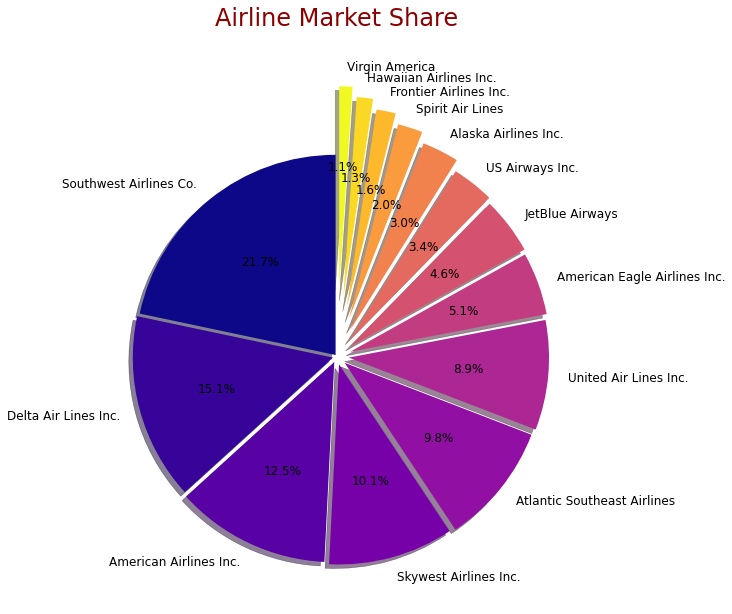

In [73]:
#performed group by operation on AIRLINE of final_df  and calculated the count of FLIGHT_NUMBER with respect to AIRLINE
airline_pct= final_df.groupby('AIRLINE')['FLIGHT_NUMBER'].count().reset_index()
#Sorted values of FLIGHT_NUMBERin ascending order
airline_pct = airline_pct.sort_values('FLIGHT_NUMBER',ascending=False).reset_index()
#dropped index column
final_pct=airline_pct.drop(columns='index')
plt.style.use('ggplot')
final_pct['FLIGHT_NUMBER'].plot.pie(                                             #used pie chart
    labels=final_pct['AIRLINE'],                                                 #labeled each sector with respect to AIRLINE
    autopct = '%0.1f%%',
    startangle = 90,
    explode=(0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.15,0.2,0.25,0.3,0.35),#Given higher explode values for small sectors 
    colormap='plasma',
    figsize=(10,10),                                                             #Selected fig size as 10*10
    shadow=True,                                                                 #enabled shadow option
    fontsize=12,                                                                 #selected font size as 12
    legend = False                                                               #Disabled legend 
)
#Labelled the title as 'Airline Market Share' at the center with the font size 24 and darkred color
plt.title(label = 'Airline Market Share',loc='center',fontsize="24",color='darkred',y=1.15)
plt.ylabel('')
plt.tight_layout()

## AIRLINE AVERAGE FLIGHT AIRTIME


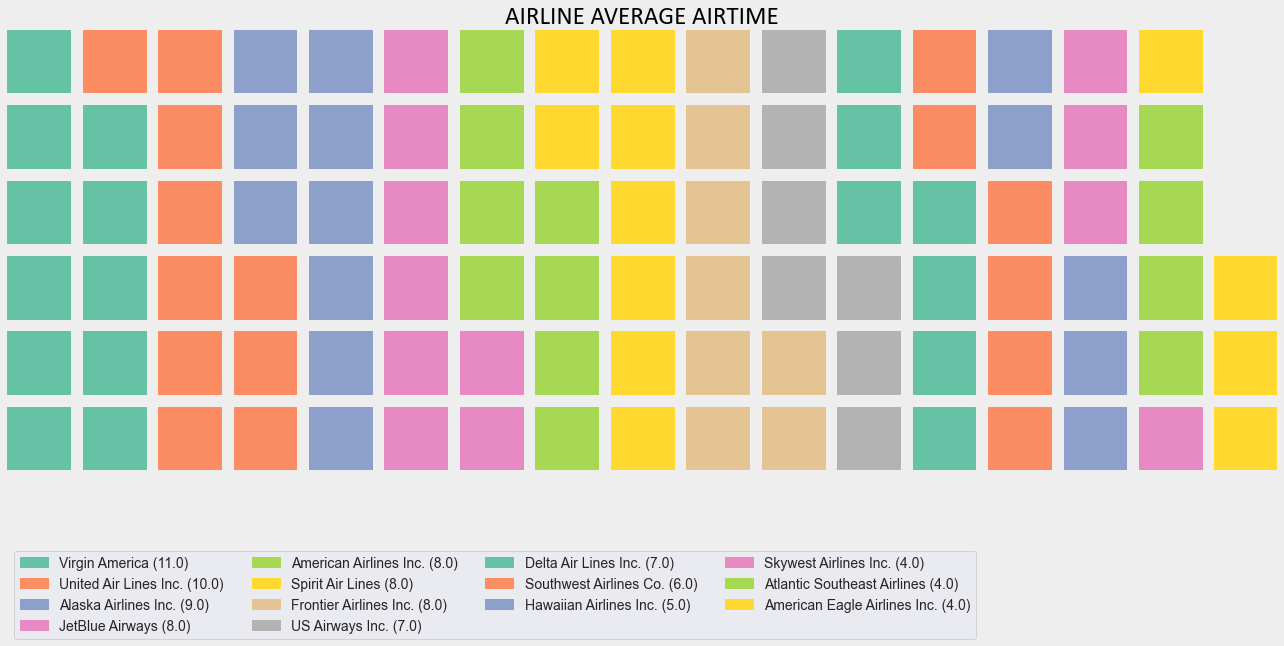

In [90]:
#Performed group by operation on AIRLINE of final_df and calculated the average of AIR_TIME and inserted to data frame
airtime=final_df.groupby('AIRLINE')['AIR_TIME'].mean().to_frame()
#sorted the values for AIR_TIME column of airtime df in descending order
airtime = airtime.sort_values(by='AIR_TIME',ascending=False).reset_index()
#total of AIR_TIME column of airtime data frame
x= airtime.AIR_TIME.sum()
#calculates the airtime percentage
airtime['Percent%'] = round(airtime['AIR_TIME']/x*100,0)
airtime
fig = plt.figure(
    FigureClass=Waffle,                     #select waffle graph
    rows=6,figsize=(18,16),                 #selected no of rows as 6 with fig size 16*16
    values=airtime['Percent%'],
    #labelled the airline and airline percentage as legend
    labels=["{0} ({1})".format(k, v) for k, v in zip(airtime.AIRLINE,airtime['Percent%'])],
    #colors=('#91EB6D','#10716E','#716C33','#6198BA', '#70E2AE', '#24FEF1', '#530862','#352D51', '#EC9619','#E612D7','#629623','#0859E4', '#A74F09','#1C315B'),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 4,'fontsize':14}
)
plt.title(
    label= 'AIRLINE AVERAGE AIRTIME', #Titled the graph as 'AIRLINE AVERAGE AIRTIME%'
    loc= 'center',                     #Placed the title at center
    fontdict={'family': 'calibri',     #Selected font style as calibri
            'color':  'black',         #Selected color as black
            'weight': 'normal',
            'size': 25,})              #Selected font size as 25
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()


# Plotted Average Arrival and Departure Delay graph using side by side bar chart

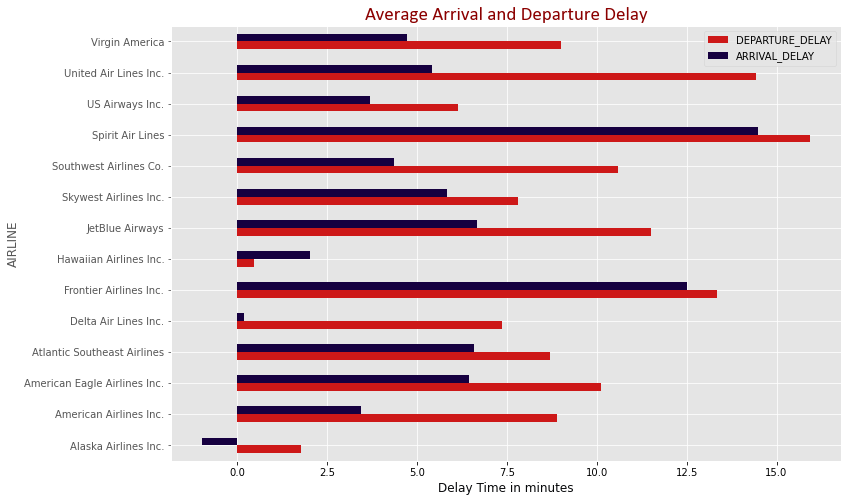

In [91]:
#selected the Barh chart with figsize (12,8) 
airline_avg_delay.plot(kind='barh',
                       figsize=(12,8),
                       
                       color={'DEPARTURE_DELAY':'#CD1818','ARRIVAL_DELAY':'#160040'}
                      )
#labelled the title as 'Average Arrival and Departure Delay' with the below mentioned characterstics
plt.title(label='Average Arrival and Departure Delay',
          fontdict={'family': 'calibri',
            'color':  'darkred',
            'weight': 'normal',
            'size': 19,
        })
plt.xlabel('Delay Time in minutes', color="#07080a")  #labelled the x-axis as 'Delay Time in minutes'
plt.rcParams['axes.edgecolor']='#333F4B'              #selected the axes edge color as  #333F4B
plt.rcParams['axes.linewidth']=0.8                    #selected the linewidth as  #0.8
plt.rcParams['xtick.color']='#07080a'                 #Selected the xtick color as #07080a
plt.rcParams['ytick.color']='#07080a'                 #Selected the ytick color as #07080a
plt.tick_params(axis='x', colors="black")             #Selected the x-axis color as #07080a
plt.show()

# Plotted the Average Monthly Departure Delay Using Line Charts for each Airlines


In [75]:
#Displays month number in a list
final_df['MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

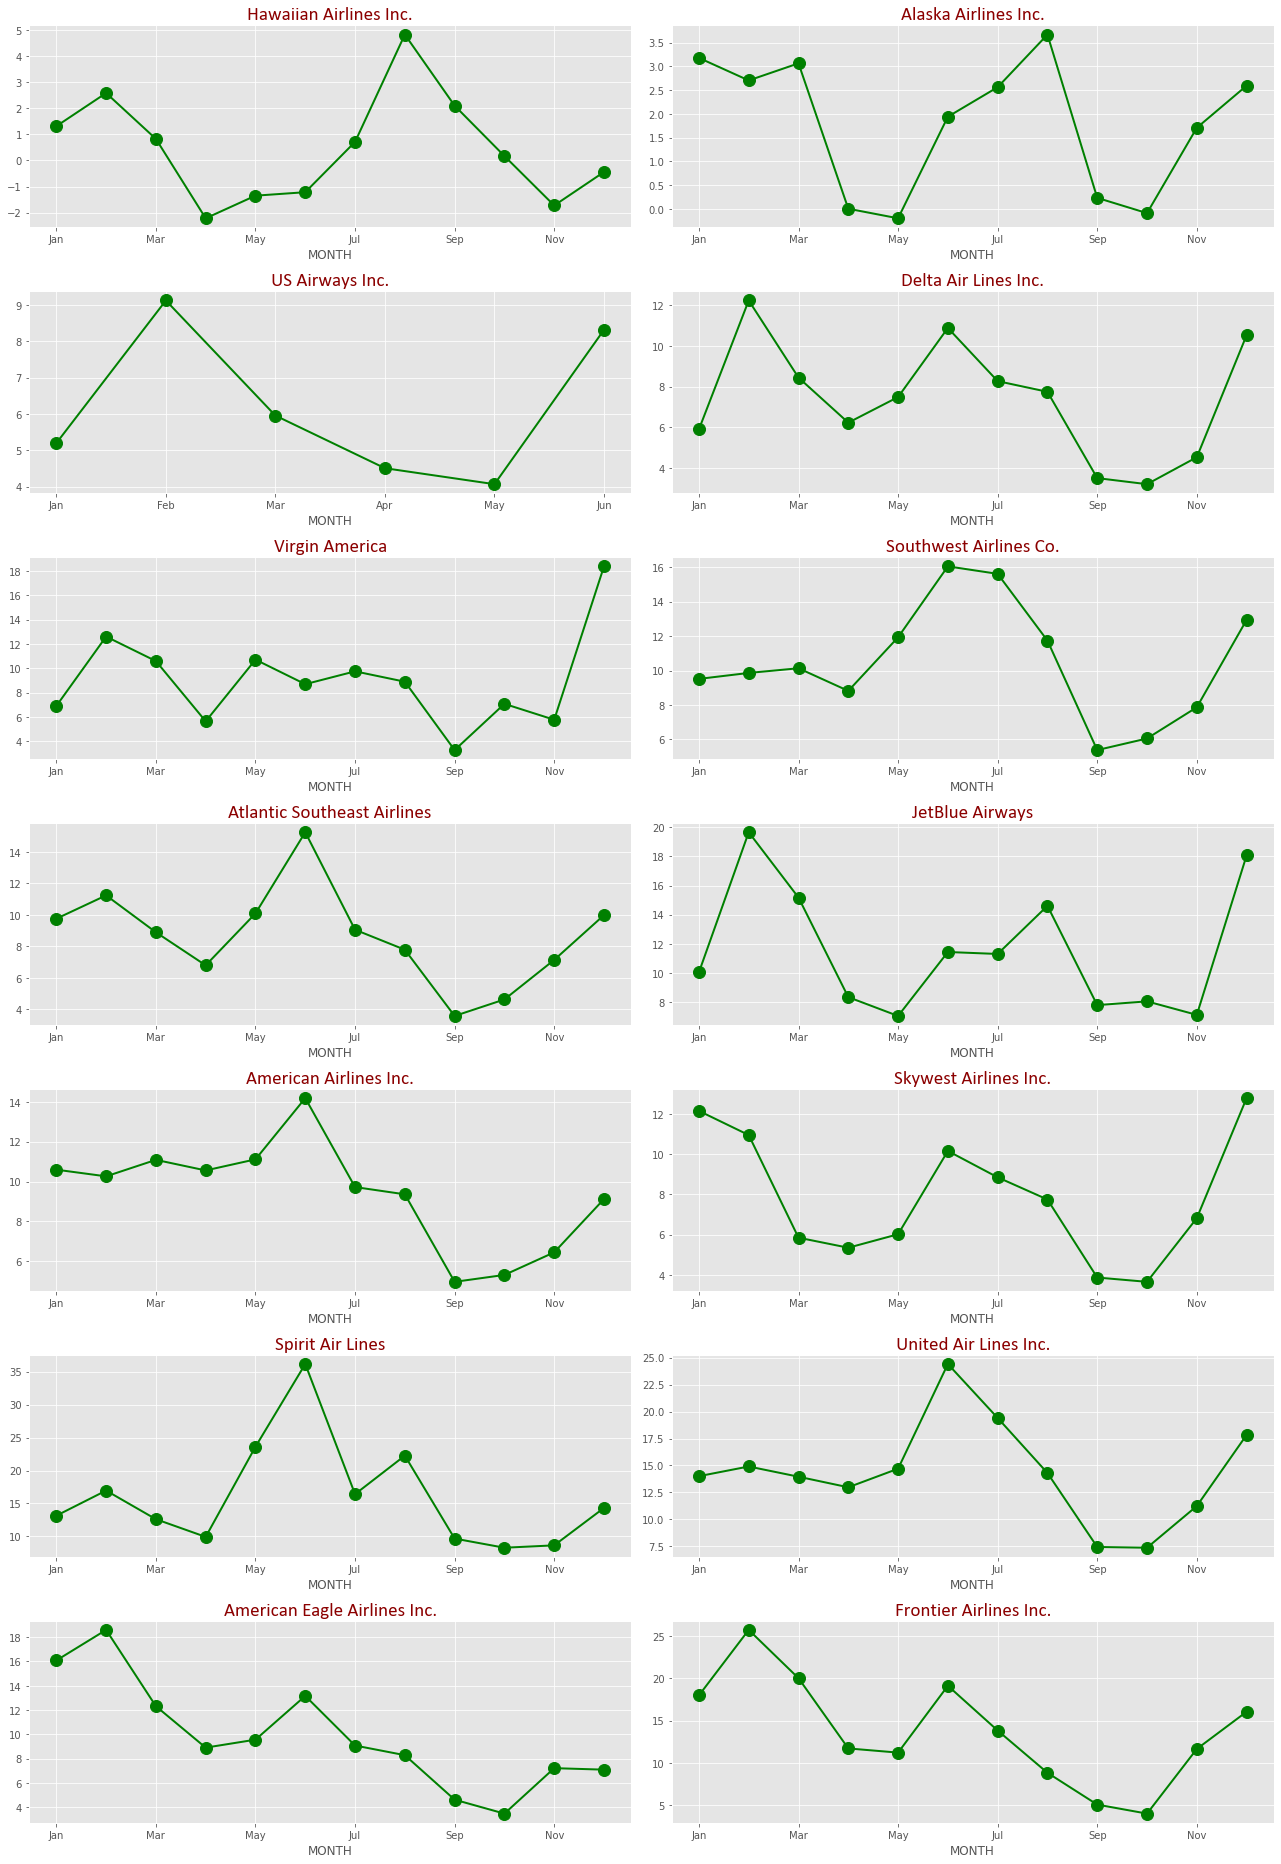

In [76]:
#Performed group by operation on MONTH, AIRLINE of final_df and calculated the mean of departure delay
monthly=final_df.groupby(['MONTH','AIRLINE'])['DEPARTURE_DELAY'].mean().reset_index() 
#sorted the MONTH, DEPARTURE_DELAY columns of monthly in ascending order
monthly_dep_delay=monthly.sort_values(['MONTH','DEPARTURE_DELAY'],ascending=True)
#filled the null values of monthly_dep_delay with 0
monthly_dep_delay.fillna(0,inplace=True)
#Selected AIRLINE column of monthly_dep_delay as index
monthly_dep_delay =monthly_dep_delay.set_index('AIRLINE')
#Speciefied months number as key and month name as value in dictionary
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
#mapped the month coulumn of monthly_dep_delay to month dictionary in order to get month names
monthly_dep_delay['MONTH'] = monthly_dep_delay['MONTH'].map(month)


fig = plt.figure(figsize=(10,8))             #Selected Fig Size as 10*8
a1 = fig.add_subplot(721)                    #Added First Subplot
a2 = fig.add_subplot(722)                    #Added Second Subplot
a3 = fig.add_subplot(723)                    #Added Third Subplot
a4 = fig.add_subplot(724)                    #Added Fourth Subplot
a5 = fig.add_subplot(725)                    #Added Fifth Subplot
a6 = fig.add_subplot(726)                    #Added Sixth Subplot
a7 = fig.add_subplot(727)                    #Added Seventh Subplot
a8 = fig.add_subplot(728)                    #Added Eighth Subplot
a9 = fig.add_subplot(729)                    #Added Ninth Subplot
a10 = fig.add_subplot(7,2,10)                #Added Tenth Subplot
a11 = fig.add_subplot(7,2,11)                #Added Eleventh Subplot
a12 = fig.add_subplot(7,2,12)                #Added Twelveth Subplot
a13 = fig.add_subplot(7,2,13)                #Added Thirteenth Subplot
a14 = fig.add_subplot(7,2,14)                #Added Fourteenth Subplot
#Added all subplots varaibles in a list
axis_list = [a1, a2, a3, a4,a5, a6, a7, a8,a9, a10, a11, a12,a13,a14]
#using for loop mapped all the airlines with names and plotted the line chart for each airline
i=0
for val in monthly_dep_delay.index.unique():
    monthly_dep_delay[monthly_dep_delay.index==val].plot('MONTH','DEPARTURE_DELAY',     #x-axis = MONTH, y-axis = DEPARTURE_DELAY
                                                         ax=axis_list[i],legend=False,  #Disabled the legend
                                                         figsize = (18,26),             #Selected fig size as 18*26
                                                         color='green', marker='o',     #Selected line chart color as green
                                                         linewidth=2, markersize=12)    #selected line width = 2 and markersize =12
    #Labelled title for each subplot
    axis_list[i].set_title(label=val,fontdict={'family': 'calibri','color':  'darkred','weight': 'normal','size': 19})
    
    i=i+1
    
a1.title
plt.tight_layout()
plt.show()



# Plotted  Monthly Flight Count Using Bar Chart


In [77]:
#Counts the occurances of month in final_df, inserted into data frame ,and sorted values by index
count_monthly = final_df['MONTH'].value_counts().to_frame().reset_index().sort_values(by='index')
#renamed the index column as month and  MONTH column as FLIGHT_COUNT
count_monthly.rename(columns={'index':'MONTH','MONTH':'FLIGHT_COUNT'},inplace=True)
#Speciefied months number as key and month name as value in dictionary
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
#mapped the month coulumn of count_monthly to month dictionary in order to get month names
count_monthly['MONTH'] = count_monthly['MONTH'].map(month)

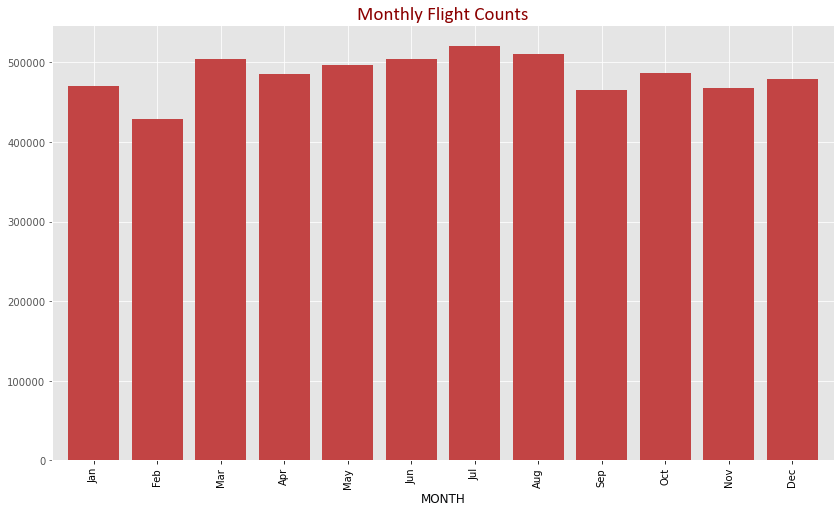

In [78]:
#Plotted bar chart with and choosen MONTH as x axis and  FLIGHT_COUNT as y-axis with fig size 14*8
count_monthly.plot.bar(x='MONTH',y='FLIGHT_COUNT',figsize=(14,8),width=0.8,color='#c24444',legend=False)
plt.title(label='Monthly Flight Counts',       #Titled the bar chart as 'Monthly Flight Counts'
          fontdict={'family': 'calibri',       #Selected font style as calibri
            'color':  'darkred',               #Selected color as darkred
            'weight': 'normal',
            'size': 19,                        #Selected title size as 19
        })
plt.xlabel('MONTH', color="#07080a")           #labeled x-axis as 'Month'
plt.rcParams['axes.edgecolor']='#333F4B'       #Selected axes edge color as #333F4B
plt.rcParams['axes.linewidth']=0.8             #selected axes linewidth as 0.8
plt.rcParams['xtick.color']='#07080a'          #Selected x-axis tickers color as 07080a
plt.rcParams['ytick.color']='#07080a'          #Selected y-axis tickers color as 07080a
plt.tick_params(axis='x', colors="black")      #Selected x-axis tickers color as black
plt.show()

# Plotted Top Airport Destinations Using Horizontal Bar Chart



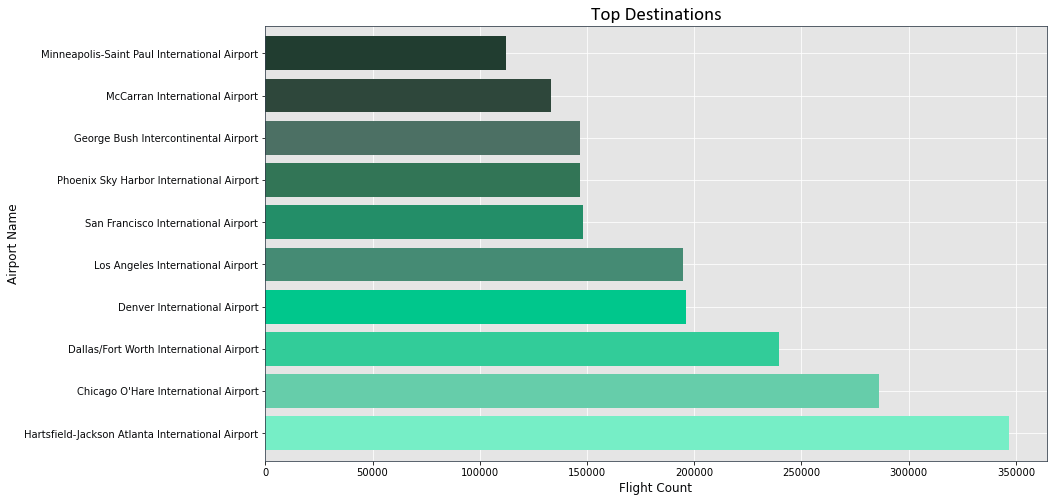

In [79]:
#top airport destinations
#Performed group by operation on DESTINATION_AIRPORT_NAME of final_df and calculated the FLIGHT_NUMBER count, inserted to data frame, and sorted FLIGHT_NUMBER column in ascendinf order
dest_top_airports = final_df.groupby('DESTINATION_AIRPORT_NAME')['FLIGHT_NUMBER'].count().to_frame().sort_values(by='FLIGHT_NUMBER',ascending=False).head(10)
#Plotted bar chart with and choosen  FLIGHT_NUMBER as y-axis with fig size 14*8
dest_top_airports.plot.barh(y='FLIGHT_NUMBER',figsize=(14,8),width=0.8,
                            color = ('#76EEC6', '#66CDAA', '#32CC99', '#00C78C', '#458B74', '#238E68', '#327556', '#4C7064', '#2E473B', '#213D30'),#colormap='summer',
                            legend=False)
plt.title(label='Top Destinations',            #Titled the bar chart as 'Top Destinations'
          fontdict={'family': 'calibri',       #Selected font style as calibri
            'color':  'black',                 #Selected color as black
            'weight': 'normal',
            'size': 19,                        #Selected title size as 19
        })
plt.xlabel('Flight Count', color="#07080a")    #labeled x-axis as 'Flight Count'
plt.ylabel('Airport Name', color="#07080a")    #labeled y-axis as 'Airport Name'
plt.rcParams['axes.edgecolor']='#333F4B'       #Selected axes edge color as #333F4B
plt.rcParams['axes.linewidth']=0.8             #selected axes linewidth as 0.8
plt.rcParams['xtick.color']='#07080a'          #Selected x-axis tickers color as 07080a
plt.rcParams['ytick.color']='#07080a'          #Selected y-axis tickers color as 07080a
plt.tick_params(axis='x', colors="black")      #Selected x-axis tickers color as black

plt.show()

# Plotted Airlines Arrival and Departure Delay Distributions Using Box Plot


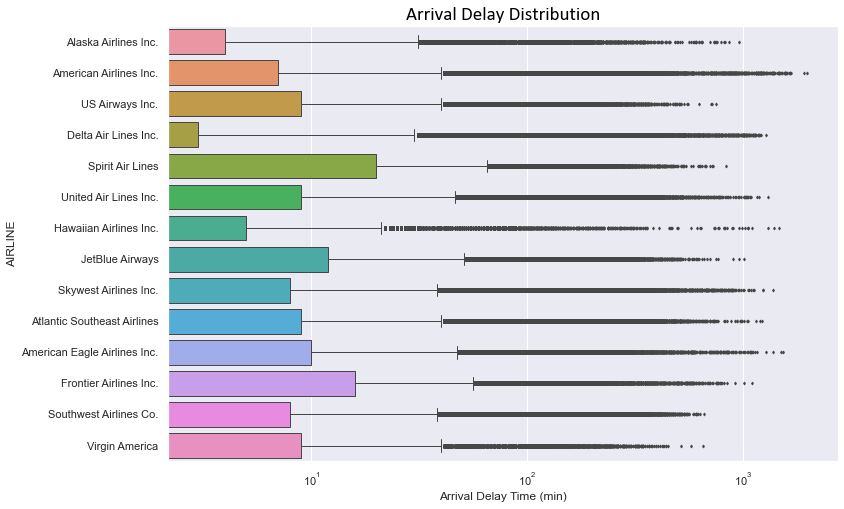

In [82]:
#Selected only ARRIVAL_DELAY, AIRLINE columns
arr_del = final_df.loc[:, ['ARRIVAL_DELAY','AIRLINE']]
#Plotted boxplot with x-axis = ARRIVAL_DELAY, y-axis = AIRLINE
ax = sns.boxplot(y='AIRLINE', x='ARRIVAL_DELAY', data=arr_del, linewidth=1, fliersize=2)
#Labelled X-axis as 'Arrival Delay Time (min)'
#will ignore the negative value (no delays)
ax.set( xscale = 'log',xlabel='Arrival Delay Time (min)') 
#Titled the graph as 'Arrival Delay Distribution'
ax.set_title('Arrival Delay Distribution',fontdict={'family': 'calibri', #Selected font style as calibri
            'color':  'black',                                           #Selected color as black
            'weight': 'normal',
            'size': 19,                                                  #Selected title size as 19
        })
sns.set(rc={'figure.figsize':(12,8)})                                    #Selected fig size as 12*8
plt.show()

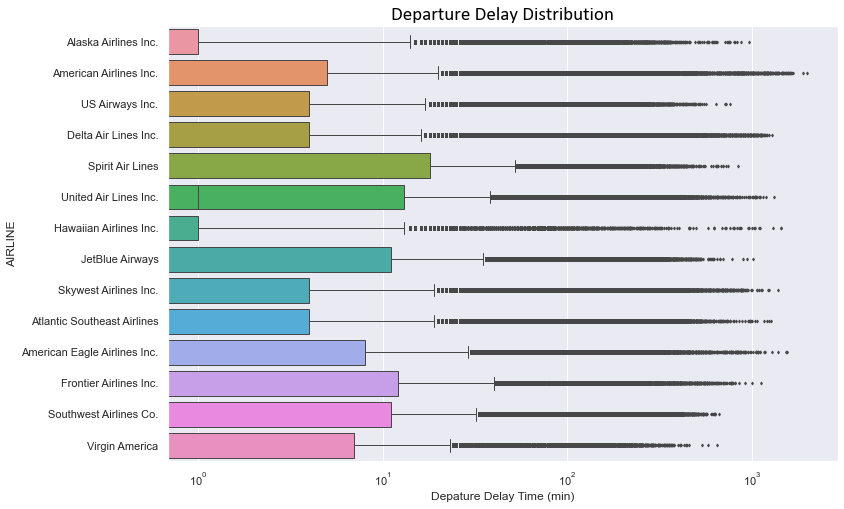

In [83]:
#Selected only DEPARTURE_DELAY, AIRLINE columns
dep_del = final_df.loc[:, ['DEPARTURE_DELAY','AIRLINE']]
#Plotted boxplot with x-axis = DEPARTURE_DELAY, y-axis = AIRLINE
ax = sns.boxplot(y='AIRLINE', x='DEPARTURE_DELAY', data=dep_del, linewidth=1, fliersize=2)
#Labelled X-axis as 'Depature Delay Time (min)'
ax.set(xscale="log", xlabel='Depature Delay Time (min)') #will ignore the negative value (no delays)
ax.set_title('Departure Delay Distribution',fontdict={'family': 'calibri', #Selected font style as calibri
            'color':  'black',                                             #Selected color as black
            'weight': 'normal',
            'size': 19,                                                    #Selected title size as 19
        })
sns.set(rc={'figure.figsize':(12,8)})                                      #Selected fig size as 12*8
plt.show()

# Plotted Top 20 Airport with Delayed Arrivals Using Folium Maps


In [84]:
new = final_df.copy()                                 #copied the final_df to new data frame
new['arr_delay']=new['ARRIVAL_DELAY']<0               #Selected negative arr_delay values
#Performed group by operation on DESTINATION_AIRPORT_NAME of new df and 
#calculated the count of arr_delay and inserted to data frame
state_wise_arr=new.groupby('DESTINATION_AIRPORT_NAME')['arr_delay'].count().to_frame()
# merged the state_wise_arr and airports data frames
delay_arr_state = state_wise_arr.merge(airports.loc[:,['LATITUDE','LONGITUDE','AIRPORT']],left_on='DESTINATION_AIRPORT_NAME',right_on='AIRPORT')
#sorted arr_delay column values of delay_arr_state data frame in ascending order
delay_arr_state_final=delay_arr_state.sort_values(by='arr_delay',ascending=False).reset_index(drop=True)
delay_arr_state_final.dropna(how='any',inplace=True)   #Drops the rows if any columns is empty
delay_arr_state_final=delay_arr_state_final.head(20)   #displays first 20 rows in delay_arr_state_final


In [85]:
import folium               #imports folium library 
world_map =  folium.Map()   #using map function from folium library
#passed the latitude, longitude and zoom level parameters in map function
world_map = folium.Map(location=[37.0902, -95.7129], zoom_start=3.5#,tiles='Stamen Toner'
                      )
#Titled the graph as 'Top 20 Airport with Delayed Arrivals'
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Top 20 Airport with Delayed Arrivals</b></h3>
             '''
#Displays the Title
world_map.get_root().html.add_child(folium.Element(title_html))


##Based on arrival delay, colorcode function assigns the radius size 
def marksize(x):
    if x in range(239582,346910):
        rad = 20
    elif x in range(108398,196010):
        rad = 15
    elif x in range(97193,108398):
        rad = 10
    else:
        rad = 5
    return rad
#for each LATITUDE,LONGITUDE, arr_delay, and AIRPORT of delay_arr_state_final df marks the latitude and longitude with circle and radius as defined in above functuions
for lat, lon, value, name in zip(delay_arr_state_final['LATITUDE'], delay_arr_state_final['LONGITUDE'], 
                                 delay_arr_state_final['arr_delay'], delay_arr_state_final['AIRPORT']):
    folium.CircleMarker([lat, lon],
                        radius=marksize(value),                                                 #gets the radius from marksize function based on flight count
                        popup = ('<strong>AIRPORT</strong>: ' + str(name).capitalize() + '<br>' #Popus the AIRPORT and Arrival_delay info
                                '<strong>Arrival_delay</strong>: ' + str(value) + '<br>'),
                         linecolor='red',                                                       #selected line color as red
                         fill=True,
                         fill_color='red',#colorcode(value),                                           #gets the color code from colorcode function based on flight count
                         fill_opacity=0.7 ).add_to(world_map)                                   #selected opacity as 0.7
world_map

### Destinations With Most Cancellations


In [86]:
#Performed group by operation on DESTINATION_AIRPORT_NAME of new df and calculated the count of CANCELLED and inserted to data frame
canceled_to=final_df[final_df['CANCELLED']==1].groupby('DESTINATION_AIRPORT_NAME')['CANCELLED'].count().to_frame()
## merged the canceled_to and airports data frames
canceled_to_final = canceled_to.merge(airports.loc[:,['LATITUDE','LONGITUDE','AIRPORT']],left_on='DESTINATION_AIRPORT_NAME',right_on='AIRPORT')
#sorted the values for cancelled column of canceled_to_final df in descending order
canceled_to_final=canceled_to_final.sort_values(by='CANCELLED',ascending=False).reset_index(drop=True)
#displays the first 10 rows in canceled_to_final
canceled_to_final = canceled_to_final.head(10)
canceled_to_final

,CANCELLED,LATITUDE,LONGITUDE,AIRPORT
0,9273,41.97960,-87.90446,Chicago O'Hare International Airport
1,6749,32.89595,-97.03720,Dallas/Fort Worth International Airport
2,4418,40.77724,-73.87261,LaGuardia Airport (Marine Air Terminal)
3,3350,40.69250,-74.16866,Newark Liberty International Airport
4,2715,33.64044,-84.42694,Hartsfield-Jackson Atlanta International Airport
5,2658,42.36435,-71.00518,Gen. Edward Lawrence Logan International Airport
6,2432,29.98047,-95.33972,George Bush Intercontinental Airport
7,2310,39.85841,-104.66700,Denver International Airport
8,2305,37.61900,-122.37484,San Francisco International Airport
9,2259,33.94254,-118.40807,Los Angeles International Airport


In [87]:
#passed the latitude, longitude and zoom level parameters in map function
map2 = folium.Map(location=[38.9, -95.715], tiles='Stamen Toner', zoom_start=4)
#Titled the graph as Airports with Most Cancelled Flights
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airports with Most Cancelled Flights</b></h3>
             '''
#Displays the Title
map2.get_root().html.add_child(folium.Element(title_html))
#selected the LATITUDE and LONGITUDE columns of canceled_to_final df
locations = canceled_to_final[['LATITUDE','LONGITUDE']]
#all the values in the location column insertes to a list
locationlist = locations.values.tolist()
#Based on cancelled point, colorcode function assigns the color 
def colorcode(x):
    if x in range(6800,10000):
        color = 'darkred'
    elif x in range(2650,6800):
        color = 'red'
    elif x in range(2200,2650):
        color = 'lightred'
    else:
        color = 'orange'
    return color
#Marked the Top 10 airports with most cancellations using folium and marked using folium marker
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],
                  popup=(canceled_to_final['AIRPORT'][point]+'<br>'+'<strong>Cancelled Flights:</strong> '+str(canceled_to_final['CANCELLED'][point])),
                  icon=folium.Icon(color=colorcode(canceled_to_final['CANCELLED'][point]), icon_color='white', icon='home', angle=0, prefix='fa')).add_to(map2)
map2